In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing,metrics,ensemble

In [2]:
# Reading the training dataset

X = pd.read_csv('train.csv')
X.drop(columns=['Name','Ticket','PassengerId'],inplace=True)
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [3]:
# Splitting into features and labels

y = X.pop('Survived')
y.head()


original_cols = X.columns

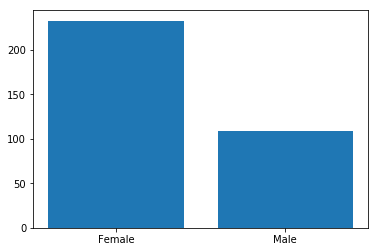

In [4]:
# Plotting Survival vs Sex graph

b = X.Sex[ y == 1].value_counts()

plt.bar(['Female','Male'],b)
plt.show()

In [5]:
# Converting Cabin 

def get_first_letter(c):
    return c[0] if type(c)!=float else 'None'

X.Cabin = pd.DataFrame([ get_first_letter(c) for c in X.Cabin ])

X['Cabin'].head()

0    None
1       C
2    None
3       C
4    None
Name: Cabin, dtype: object

In [6]:
# Removing Dummies

columns = ['Sex','Embarked','Cabin']
for column in columns:
    dum = pd.get_dummies(X[column],prefix=column,prefix_sep="_")
    X = pd.concat([X,dum],axis=1)
    X.drop(columns=[column],inplace=True)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T
0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,1,0,0,0,0,0,0
4,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [7]:
# Handle Missing Data

cols = X.columns

for col in cols:
    if X[col].isna().any() or X[col].isnull().any():
        X[col] = X[col].fillna(X[col].mean())
        
for col in cols:
    if X[col].isna().any() or X[col].isnull().any():
        print col

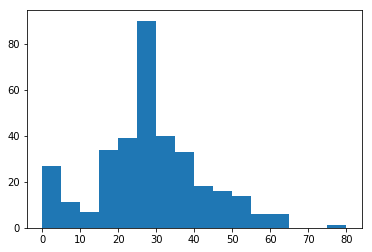

In [8]:
# Plotting Survival vs Age graph

b = range(int(X.Age.min()),int(X.Age.max()+1),5)

plt.hist(X.Age[ y == 1 ],bins=b,histtype='bar')
plt.show()

In [9]:
# Feature Scaling

scalar_x = preprocessing.StandardScaler()
X = scalar_x.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,-0.737695,0.737695,-0.482043,-0.307562,0.619306,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,0.544925,-0.03352
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,1.355574,-1.355574,2.074505,-0.307562,-1.614710,-0.130856,-0.235981,3.755222,-0.196116,-0.193009,-0.121681,-0.067153,-1.835115,-0.03352
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,-0.482043,-0.307562,0.619306,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,0.544925,-0.03352
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,1.355574,-1.355574,-0.482043,-0.307562,0.619306,-0.130856,-0.235981,3.755222,-0.196116,-0.193009,-0.121681,-0.067153,-1.835115,-0.03352
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.619306,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,0.544925,-0.03352


In [10]:
#Training the classifier

cls = ensemble.RandomForestClassifier(random_state=0,n_jobs=-1,oob_score=True)
cls.fit(X,y)

/home/akash/.local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/akash/.local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [11]:
# Testing the OOB Score

cls.oob_score_

0.797979797979798

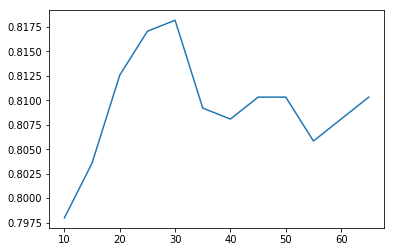

In [12]:
# Checking accuracy for diff values of N_estimators

n_estimators = range(10,70,5)

score = []

for i in n_estimators:
    cls = ensemble.RandomForestClassifier(n_jobs=-1,oob_score=True,n_estimators=i,random_state=0)
    cls.fit(X,y)
    score.append(cls.oob_score_)
    
plt.plot(n_estimators,score)
plt.show()

# Best Result near 30

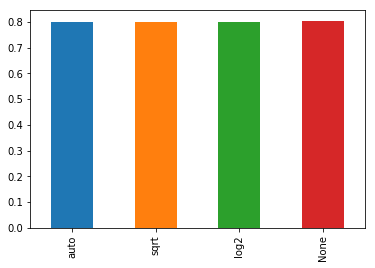

In [13]:
# Checking Accuracy for diff max_features

max_features = ['auto','sqrt','log2',None]

score = []


for i in max_features:
    cls = ensemble.RandomForestClassifier(n_jobs=-1,oob_score=True,max_features=i,random_state=0,)
    cls.fit(X,y)
    score.append(cls.oob_score_)
    
plot_f = pd.Series(score,index=max_features)
plot_f.plot(kind='bar')

# Best result in none

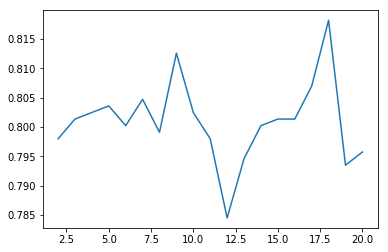

In [14]:
# Checking Accuracy for diff min_sample split

min_sample_split = range(2,21)

score = []


for i in min_sample_split:
    cls = ensemble.RandomForestClassifier(n_jobs=-1,oob_score=True,min_samples_split=i,random_state=0,)
    cls.fit(X,y)
    score.append(cls.oob_score_)
    
plt.plot(min_sample_split,score)


# Best result in 19

In [15]:
# Final Classifier

cls = ensemble.RandomForestClassifier(n_jobs=-1,oob_score=True,min_samples_split=19,random_state=0,
                                      max_features='sqrt',n_estimators=30)
cls.fit(X,y)

print `cls.oob_score_*100`+"%"

81.25701459034792%


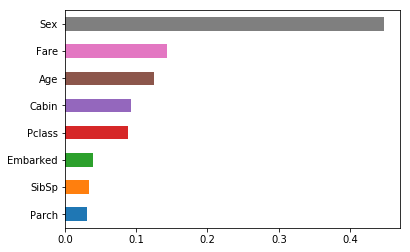

In [16]:
# Checking importance of each feature 

imp = pd.Series(cls.feature_importances_,index=cols)

val = []

for col_name in original_cols:
    sm = 0
    dummies = [ x for x in cols if col_name in x ]
    sm = sum([ imp.get(x) for x in dummies ])
    val.append(sm)

imp = pd.Series(val,index=original_cols)
    
imp.sort_values(inplace=True)
imp.plot(kind='barh')

In [18]:
# Scores

pred = cls.predict(X)

print "Accuracy Score",metrics.accuracy_score(y,pred)*100
print "F1 Score",metrics.f1_score(y,pred)*100
print 'roc_auc_score',metrics.roc_auc_score(y,pred)*100
print "Recall Score",metrics.recall_score(y,pred)*100

Accuracy Score 87.09315375982042
F1 Score 81.71701112877584
roc_auc_score 84.84085897804621
Recall Score 75.14619883040936
